In [127]:
# Importing libraries
import numpy as np
import pandas as pd
import datetime as dt
import yfinance as yf
import matplotlib.pyplot as plt
from scipy.stats import norm


In [128]:
# Setting the timeline
years= 15

end_date= dt.datetime.today()
start_date= end_date - dt.timedelta(days=years*365)
# print(start_date)
# print(end_date)


In [129]:
# Creating a list of tickers
tickers= ["SPY", "BND", "GLD", "QQQ", "VTI"]


In [130]:
# Downloading the daily close prices for the tickers
close_df= pd.DataFrame()

for ticker in tickers:
    data= yf.download(ticker, start= start_date, end= end_date)
    close_df[ticker]= data["Close"]

close_df= close_df.dropna()
print(close_df.head())


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

                  SPY        BND         GLD        QQQ        VTI
Date                                                              
2010-04-19  91.045937  51.639626  111.150002  43.218163  46.753307
2010-04-20  91.859047  51.691704  111.459999  43.436424  47.196251
2010-04-21  91.691849  51.730793  112.309998  43.680889  47.158054
2010-04-22  91.965385  51.698193  111.839996  43.925354  47.387173
2010-04-23  92.565735  51.659138  113.190002  44.108707  47.707928


In [131]:
# Calculating the daily log returns and drop any NAs
log_returns= np.log(close_df/close_df.shift(1))
log_returns= log_returns.dropna()

print(log_returns.head())


                 SPY       BND       GLD       QQQ       VTI
Date                                                        
2010-04-20  0.008891  0.001008  0.002785  0.005038  0.009429
2010-04-21 -0.001822  0.000756  0.007597  0.005612 -0.000810
2010-04-22  0.002979 -0.000630 -0.004194  0.005581  0.004847
2010-04-23  0.006507 -0.000756  0.011999  0.004166  0.006746
2010-04-26 -0.003783 -0.000504 -0.003895 -0.002180 -0.003528


In [132]:
# Creating an equally weighted portfolio
portfolio_value= 1000000

weights= np.array([1/len(tickers)]*len(tickers))
# print(weights)


In [133]:
# Calculating the historical portfolio returns
historical_returns= (log_returns * weights).sum(axis=1)
print(historical_returns.head())


Date
2010-04-20    0.005430
2010-04-21    0.002267
2010-04-22    0.001717
2010-04-23    0.005732
2010-04-26   -0.002778
dtype: float64


In [134]:
# Finding the X-day historical returns
days= 5

returns_range= historical_returns.rolling(window= days).sum()
returns_range= returns_range.dropna()
print(returns_range.head())


Date
2010-04-26    0.012368
2010-04-27   -0.002981
2010-04-28   -0.002985
2010-04-29    0.003839
2010-04-30   -0.010289
dtype: float64


In [135]:
#Specifying a confidence interval and calculating VaR using the historical method
confidence_interval= 0.99

VaR_percentage= np.percentile(returns_range, 100 - (confidence_interval * 100))
VaR_dollar= (VaR_percentage * portfolio_value) * -1

print(f"VaR= {VaR_percentage*-100}%")
print(f"VaR= ${VaR_dollar}")


VaR= 4.449519398540962%
VaR= $44495.19398540962


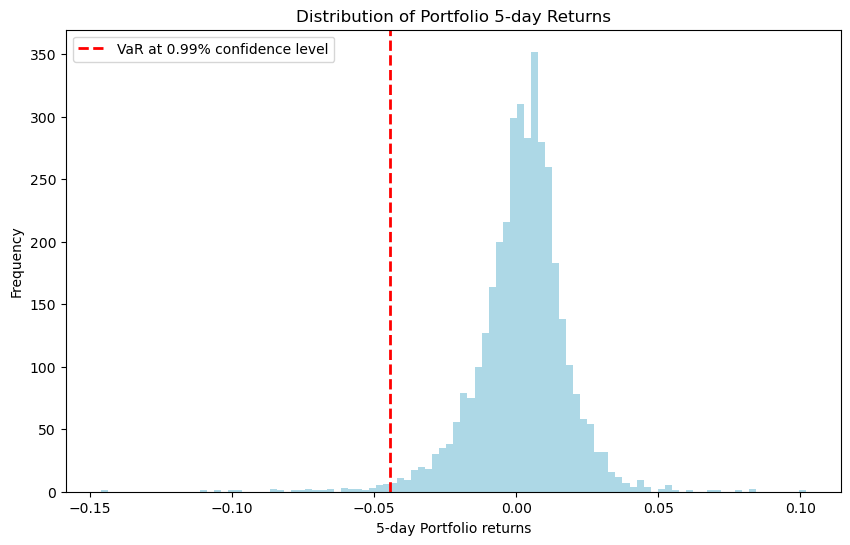

In [136]:
# Plotting the results of historical returns
returns_range_percent= returns_range * 100
# print(returns_range_percent.head())

plt.figure(figsize=(10,6))
plt.hist(returns_range, bins=100, color="lightblue")
plt.title(f"Distribution of Portfolio {days}-day Returns")
plt.xlabel(f"{days}-day Portfolio returns")
plt.ylabel("Frequency")
plt.axvline(VaR_percentage, color= "red", linestyle= "--", linewidth= 2, label= f"VaR at {confidence_interval}% confidence level")
plt.legend(loc= "upper left")

plt.show()
